<a href="https://colab.research.google.com/github/FaustoJuarez/Machine-Learning-Journey/blob/main/RGBtoSeparatedBands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Calculating for our Area of Interest


In [11]:
!pip install rawpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.5 MB/s eta 0:00:00


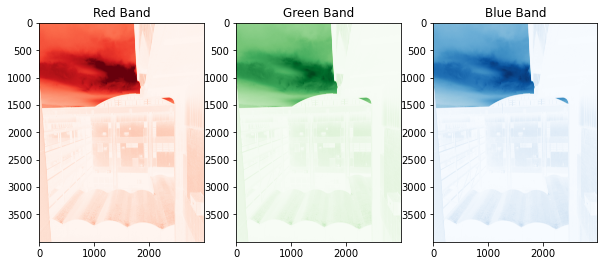

In [12]:
import rawpy
import numpy as np
import matplotlib.pyplot as plt

# Load the .dng image
with rawpy.imread("/content/quintaagro16-2-23.dng") as raw:
    # Get the raw RGB data
    rgb = raw.postprocess()

# Split the RGB data into separate bands
r = rgb[:, :, 0]
g = rgb[:, :, 1]
b = rgb[:, :, 2]

# Display the RGB bands using matplotlib
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
ax1.imshow(r, cmap='Reds')
ax1.set_title('Red Band')
ax2.imshow(g, cmap='Greens')
ax2.set_title('Green Band')
ax3.imshow(b, cmap='Blues')
ax3.set_title('Blue Band')
plt.show()


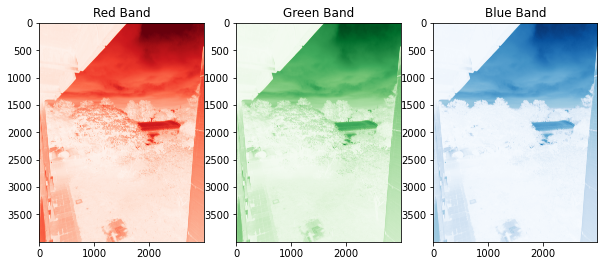

In [13]:
import rawpy
import numpy as np
import matplotlib.pyplot as plt

# Load the .dng image
with rawpy.imread("/content/quintaagro16-2-23-2.dng") as raw:
    # Get the raw RGB data
    rgb = raw.postprocess()

# Split the RGB data into separate bands
r = rgb[:, :, 0]
g = rgb[:, :, 1]
b = rgb[:, :, 2]

# Display the RGB bands using matplotlib
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
ax1.imshow(r, cmap='Reds')
ax1.set_title('Red Band')
ax2.imshow(g, cmap='Greens')
ax2.set_title('Green Band')
ax3.imshow(b, cmap='Blues')
ax3.set_title('Blue Band')
plt.show()


In [18]:
import rawpy
import cv2
from google.colab.patches import cv2_imshow

# Load the .dng image using rawpy
with rawpy.imread('/content/quintaagro16-2-23-2.dng') as raw:
    rgb = raw.postprocess()

# Split the image into red, green, and blue channels
b, g, r = cv2.split(rgb)

# Merge the channels back into a BGR image
img_bgr = cv2.merge([b, g, r])

# Display the BGR image
cv2.imshow('/content/quintaagro16-2-23-2.dng', img_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

DisabledFunctionError: ignored